# NAME: Mayuri Patel, EMAIL: mpate131@uncc.edu

### - Importing the modules to accomplish the given task:

In [1]:
#importing the modules.
import pandas as pd

# Module geopandas is use to generate a world map
# shapely import is use for adding the points on the plot

import matplotlib.pyplot as plt
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point

### - Reading the files of COVID-19 using Pandas.

In [2]:
#adding path that can be changed by any user to successfully run the code. 
path = "C:/Users/mayur/Documents/GitHub/COVID19_project/COVID19_files/"

#reading all the three files of Covid-19 data into a pandas dataframe.
confirmed = pd.read_csv(path + "time_series_19-covid-Confirmed.csv")
deaths = pd.read_csv(path + "time_series_19-covid-Deaths.csv")
recovered = pd.read_csv(path + "time_series_19-covid-Recovered.csv")

### - ANALYZING EACH OF THE GIVEN TASK:

## 1. Generate plots (use sort() and head() to make visualizations of most affected regions):

### a) Area map of deaths by country within last 8 days:

In [ ]:
# covid-19 death data
deaths

In [3]:
# parsing the death dataframe based on columns required for analysis.
# Here, we need only last 8 days of data for visualization
death_bycountry = deaths.iloc[:,[1,44,45,46,47,48,49,50,51]]

#groupby is use for country and then sum up the values
country_sum = death_bycountry.groupby("Country/Region").sum()

#sorting the values with most recent date, after which using head function inputting particular rows to view over which transposing the data
sort_country = country_sum.sort_values(by="3/9/20",ascending=False)
head_five = sort_country.head(5).T

#flip the data for proper visualization of area map.
flip_data = head_five[head_five.columns[::-1]]


Text(0, 0.5, 'Number Of CASES')

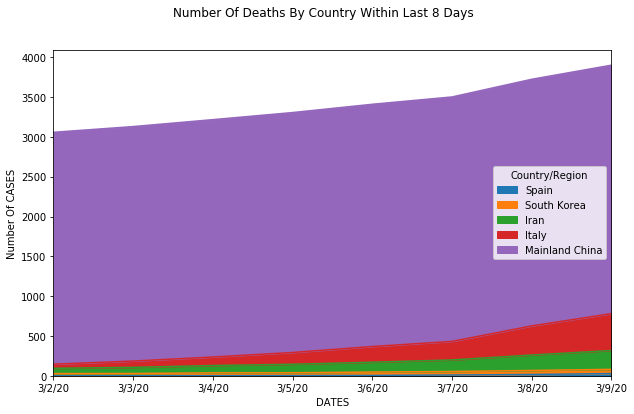

In [4]:
#plotting the area map by country within last 8 days
#mentioning the type of plot and size of figure
plt = flip_data.plot(kind="area",figsize=(10,6))

#adding the title and x,y labels to a plot
plt.figure.suptitle("Number Of Deaths By Country Within Last 8 Days")
plt.set_xlabel("DATES")
plt.set_ylabel("Number Of CASES")

### b) Line graph of deaths by US state:

In [5]:
#extracting the US data from the given country column.
deaths_US = deaths[deaths["Country/Region"] =="US"]

# adding a new column by splitting the State column after selecting the USA data
deaths_US["State"] = deaths_US["Province/State"].str.split(",",n=2,expand=True)[1]


C:\Users\mayur\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Text(0, 0.5, 'Number Of CASES')

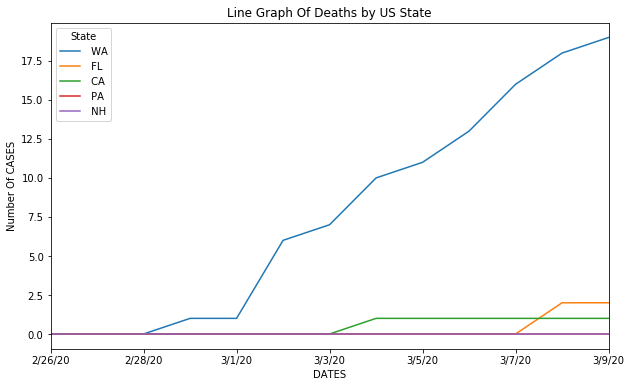

In [6]:
#selecting the data required for the plotting data - group by and sum the given data.
deaths_bystate = deaths_US.iloc[:,4:53].groupby("State").sum()
for_plot = deaths_bystate.sort_values(by="3/9/20",ascending =False).head(5)
#picking up few of the columns for proper visualization of the line graph
#transpose the data
plot_data = for_plot.iloc[:,35:48].T

#plot the line graph of US states deaths
plt_line = plot_data.plot(kind = "line",title = "Line Graph Of Deaths by US State",figsize =(10,6))
#labelling the x,y axes
plt_line.set_xlabel("DATES")
plt_line.set_ylabel("Number Of CASES")

### c) Line graph of (confirmed cases Vs recovered) by US State:

In [ ]:
#confirmed cases of covid-19 data
confirmed

In [ ]:
#recovered cases of covid-19 data
recovered 

- for recovered cases 

In [7]:
# extracting the data based on US country.
recovered_US = recovered[recovered["Country/Region"] =="US"]

# adding a new column by splitting the State column.
recovered_US["State"] = recovered_US["Province/State"].str.split(",",n=2,expand=True)[1]

#groupby states and sum up the data
#dropping the unrequired columns...
recovered_groupby = recovered_US.groupby("State").sum().drop(["Lat","Long"],axis=1)


C:\Users\mayur\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [8]:
#each state total recovered cases are summed up..and added to a new column
recovered_groupby["Total-Recovered"] = recovered_groupby.iloc[:,2:53].sum(axis=1)

#new resultant data with total recovered cases..
total_recovered = recovered_groupby[["Total-Recovered"]]


- for confirmed cases

In [9]:
# extracting the data based on US country.
confirmed_US = confirmed[confirmed["Country/Region"] =="US"]

# adding a new column by splitting the State column.
confirmed_US["State"] = confirmed_US["Province/State"].str.split(",",n=2,expand=True)[1]

#groupby states and sum up the data
#dropping the unrequired columns...
confirmed_groupby = confirmed_US.groupby("State").sum().drop(["Lat","Long"],axis=1)


C:\Users\mayur\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [10]:
#each state total confirmed cases are summed up and added to a new column
confirmed_groupby["Total-Confirmed"] = confirmed_groupby.iloc[:,2:53].sum(axis=1)

#new resultant data with total confirmed cases..
total_confirmed = confirmed_groupby[["Total-Confirmed"]]

- comparing the recovered Vs confirmed cases

In [11]:
#both the new resultant data are joined to generate a line graph..
result_data = pd.concat([total_confirmed, total_recovered],axis =1,sort = False)

#sort and head the values based on confirmed cases as it is higher than recovered...
final_result = result_data.sort_values("Total-Confirmed",ascending = False).head(10)

Text(0, 0.5, 'Number Of CASES')

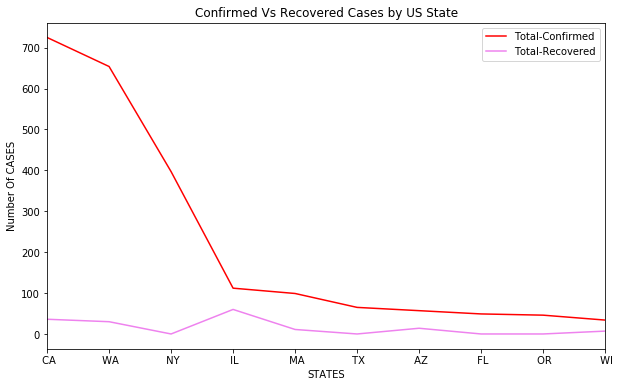

In [12]:
#plot the line graph between the recovered and confirmed cases.
plot_comp = final_result.plot(kind ="line",title ="Confirmed Vs Recovered Cases by US State", figsize = (10,6),color = ["Red","Violet"])
#labelling the x,y axes
plot_comp.set_xlabel("STATES")
plot_comp.set_ylabel("Number Of CASES")

### d) Line graph of confirmed cases by US state:

In [13]:
#taking the confirmed cases of US state from previous task
confirmed_bystate = confirmed_US.iloc[:,4:53].groupby("State").sum()
#sort, head, and transpose the data to plot
conf_byState = confirmed_bystate.sort_values(by="3/9/20",ascending =False)
transpose_ConfirmedDt = conf_byState.head(5).T 


Text(0, 0.5, 'Number Of CASES')

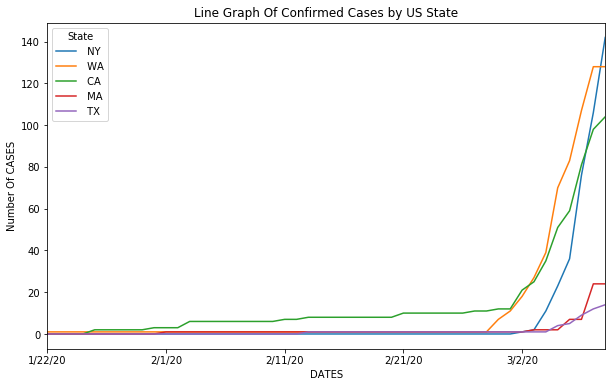

In [14]:
#plot the line graph between the recovered and confirmed cases.
plot_conf = transpose_ConfirmedDt.plot(kind ="line",title ="Line Graph Of Confirmed Cases by US State", figsize = (10,6))
#labelling the x,y axes
plot_conf.set_xlabel("DATES")
plot_conf.set_ylabel("Number Of CASES")

### e) Area Map of Proportion of Confirmed cases by US State:

In [15]:
#using the confirmed cases by state from previous task
CBS_top = conf_byState.head().T
#reset the index for the given data
CBS_top_recent = CBS_top.reset_index().loc[40:47]
CBS_top_recent = CBS_top_recent.set_index("index")
#summed up the data of all the columns
row_total = CBS_top_recent.sum(axis="columns")
#dividing the values to generate the proportion of the confirmed cases
CBS_proportions = CBS_top_recent.div(row_total,axis ="index")

Text(0, 0.5, 'Number of Cases by Proportion')

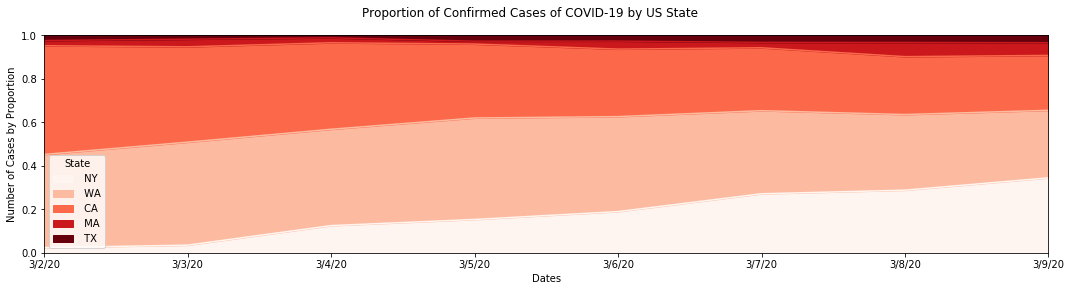

In [16]:
#plotting the data as area map
plt = CBS_proportions.plot(kind="area",figsize=(18,4),cmap="Reds",ylim=(0,1))
#labeling the title and axes
plt.figure.suptitle("Proportion of Confirmed Cases of COVID-19 by US State")
plt.set_xlabel("Dates")
plt.set_ylabel("Number of Cases by Proportion")

## 2. Parsing the relevant table, tell me:

### a) What the highest single day increase in confirmed cases by Country, and produce a line graph displaying this:


In [ ]:
# this sets the option to show all the columns in the given data.
pd.set_option('display.max_columns', None)

#confirmed cases
confirmed

Maximum Increase In The Confirmed Cases Is In Mainland China


Text(0, 0.5, 'Number Of CASES')

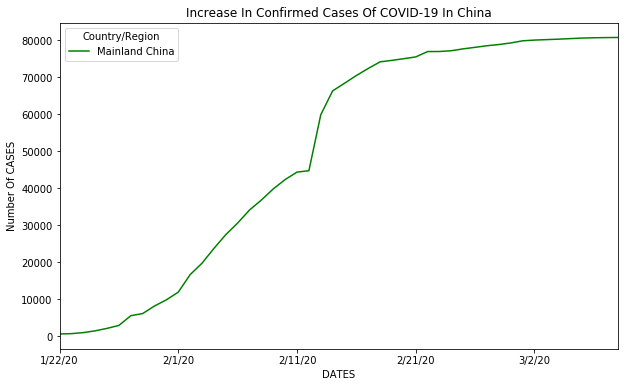

In [17]:
#dropping unnecessary columns..
confirmed_bycountry = confirmed.drop(["Province/State","Lat","Long"],axis = 1)

# grouping the data based on US country.
confirmed_data = confirmed_bycountry.groupby("Country/Region").sum()

#sorted based on the recent date for highest values...
final_confirmed = confirmed_data.sort_values("3/9/20", ascending = False)

print("Maximum Increase In The Confirmed Cases Is In Mainland China")

#picking first row containing china data..
plt = final_confirmed.head(1)
plt_T = plt.T

#plot the line graph for China with highest number of cases....
line_plt = plt_T.plot(kind = "line",Color = "Green", title = "Increase In Confirmed Cases Of COVID-19 In China",figsize=(10,6))
line_plt.set_xlabel("DATES")
line_plt.set_ylabel("Number Of CASES")

 - the difference in the value between each date is displayed using Line graph

Text(23, 12000, '2/13/20')

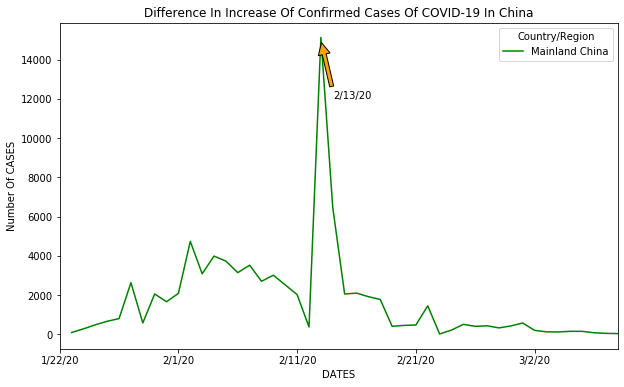

In [18]:
#get the difference in the number between the dates...
diff_dates = plt.diff(axis = 1).T

#plot the line graph for China with highest number of cases....
line_plot = diff_dates.plot(kind = "line",Color = "Green", title = "Difference In Increase Of Confirmed Cases Of COVID-19 In China",figsize=(10,6))
line_plot.set_xlabel("DATES")
line_plot.set_ylabel("Number Of CASES")

#annotated the plot to show the date with highest value.
line_plot.annotate("2/13/20",xy = (22,15000), xytext =(23,12000),arrowprops=dict(facecolor='orange', shrink=0.05))

### b) The highest single day increase in confirmed cases by US State, with a line graph displaying this:

In [19]:
# extracting the data based on US country.
confirmed_US = confirmed[confirmed["Country/Region"] =="US"]

# adding a new column states by splitting the State column.
confirmed_US["State"] = confirmed_US["Province/State"].str.split(",",n=2,expand=True)[1]


C:\Users\mayur\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Maximum Increase In The Confirmed Cases By US State Is In NY


Text(0, 0.5, 'Number Of CASES')

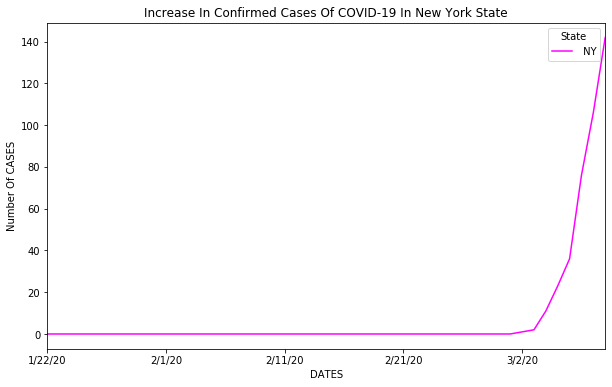

In [20]:
pd.set_option('display.max_rows', None)

#group by and sort the values for the highest  state at top most row...
confirmed_data_state = confirmed_US.iloc[:,4:53].groupby("State").sum()
final_confirmed_state = confirmed_data_state.sort_values("3/9/20", ascending = False)

print("Maximum Increase In The Confirmed Cases By US State Is In NY")

#picking first row containing new york data..
diff_for_state = final_confirmed_state.head(1)
plot_T = diff_for_state.T

#plot the line graph for NY state with highest number of cases....
plot_state = plot_T.plot(kind = "line",title= "Increase In Confirmed Cases Of COVID-19 In New York State", color = "Magenta",figsize=(10,6))
plot_state.set_xlabel("DATES")
plot_state.set_ylabel("Number Of CASES")


 - the difference in the value between each date is displayed using Line graph

Text(40, 40, '3/7/20')

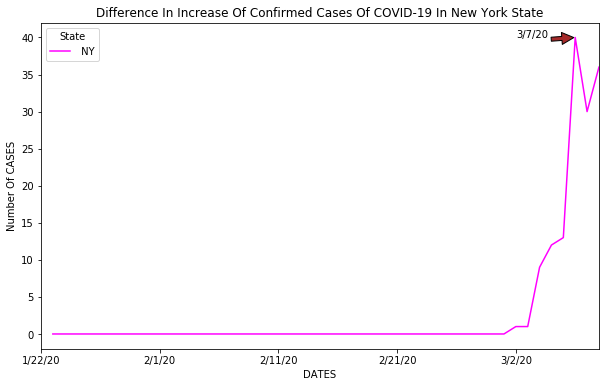

In [21]:
#taking NY state with higest value and calculating the difference between each date..
diff_T = diff_for_state.diff(axis = 1).T

#plot the line graph for NY state with highest number of cases....
plot_state = diff_T.plot(kind = "line",title= "Difference In Increase Of Confirmed Cases Of COVID-19 In New York State", color = "Magenta",figsize=(10,6))
plot_state.set_xlabel("DATES")
plot_state.set_ylabel("Number Of CASES")

#annotated the plot to show the date with highest value.
plot_state.annotate("3/7/20",xy = (45,40), xytext =(40,40),arrowprops=dict(facecolor='Brown', shrink=0.05))


# Extra credit:

## a) Comparing total number of confirmed, recovered, and death cases by country using Pie Chart:

- 

Confirmed dataframe manipulation: 

In [22]:
#confirmed data is taken and parsed based on required columns
confirmed_bycountry = confirmed.drop(["Province/State","Lat","Long"],axis = 1)
confirmed_data = confirmed_bycountry.groupby("Country/Region").sum()

#new column of total values is added
confirmed_data["Confirmed-Total"] = confirmed_data.sum(axis=1)
confTotal = confirmed_data[["Confirmed-Total"]]

- Deaths dataframe manipulation:

In [23]:
#deaths data is taken and parsed based on required columns
deaths_bycountry = deaths.drop(["Province/State","Lat","Long"],axis = 1)
deaths_data = deaths_bycountry.groupby("Country/Region").sum()

#new column of total values is added
deaths_data["Deaths-Total"] = deaths_data.sum(axis=1)
deathTotal = deaths_data[["Deaths-Total"]]


- Recovered dataframe manipulation:

In [24]:
#recovered data is taken and parsed based on required columns
recovered_bycountry = recovered.drop(["Province/State","Lat","Long"],axis = 1)
recovered_data = recovered_bycountry.groupby("Country/Region").sum()

#new column of total values is added
recovered_data["Recovered-Total"] = recovered_data.sum(axis=1)
recovTotal = recovered_data[["Recovered-Total"]]

- Joining all the data manipulated before for confirmed, deaths, and recovered cases.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002149317F5C0>,
      dtype=object)

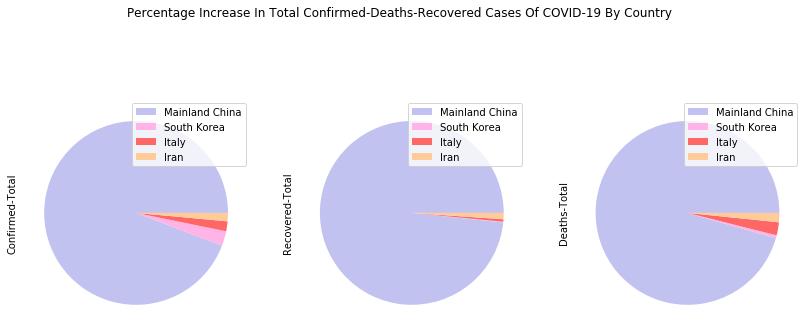

In [25]:
# all the three dataframe are joined together and sorted based on the highest column value
combine_result = pd.concat([confTotal,recovTotal,deathTotal],axis =1,sort = False)
plot_bar = combine_result.sort_values(by="Confirmed-Total",ascending = False)

# the dataframe columns are converted into percentage and used head for top most countries.
percent_data = (100* plot_bar/plot_bar.sum()).head(4)

#plotting the pie chart..
#below is the color code to add color.
colors = ['#c2c2f0','#ffb3e6','#ff6666', '#ffcc99']
percent_data.plot.pie(subplots=True,figsize=(14,6),labeldistance=None,colors = colors,title="Percentage Increase In Total Confirmed-Deaths-Recovered Cases Of COVID-19 By Country")


## b) Plotting the Geo plot of confirmed cases of countries states using longitude and latitude data:

- Till now two columns Longitude and Latitude were not manipulated to see what can be done with those columns.
- I tried Scatter plot on confirmed cases using the Latitude and Longitude columns, but I couldn't figure to what area that data points belong to....
- So, I added world map as a background for exact visualization of the data points.

- modules required for Geo plot:

In [26]:
#confirmed cases data is taken with required columns.
lat_long_cols = confirmed.iloc[:,[2,3]]

#here zip both the longitudinal and latitude columns to assign their values to a Point variable.
geometry_points = [Point(xy) for xy in zip(lat_long_cols['Long'], lat_long_cols['Lat'])]

#the before variables are taken into a geodataframe and new column geometry is added
latLong_data = GeoDataFrame(lat_long_cols, geometry=geometry_points)   


Text(75.875, 0.5, 'Latitude')

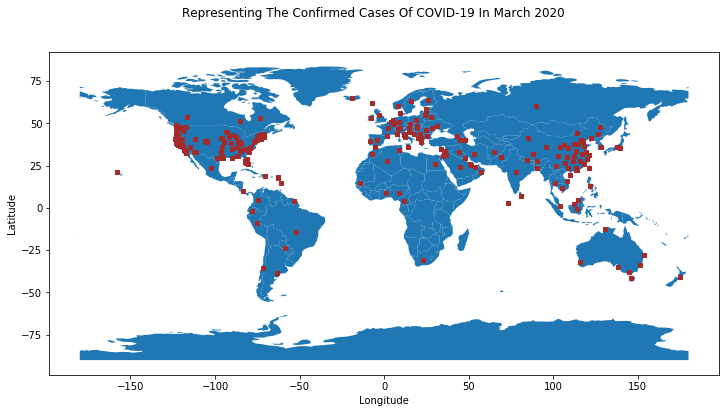

In [27]:
#world data is taken from the geopandas to plot world map as a background.
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#using the world map to point the data, and labeling the plot title and axes.
country_confCases = latLong_data.plot(ax=world.plot(figsize=(12,6)),marker='s',color='brown', markersize=12)
country_confCases.figure.suptitle("Representing The Confirmed Cases Of COVID-19 In March 2020")
country_confCases.set_xlabel("Longitude")
country_confCases.set_ylabel("Latitude")